In [1]:

from matdat import Figure, Subplot, SubplotTime
from matdat import linePlot, scatterPlot
from matpos import MatPos
import matplotlib.pyplot as plt

%matplotlib inline

(0, 2)

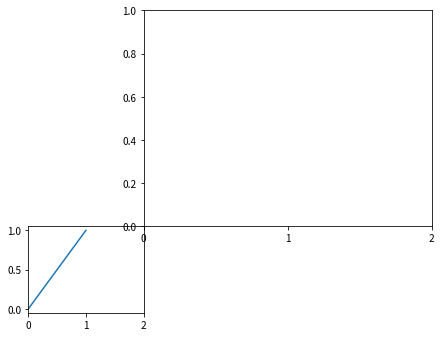

In [2]:
f = plt.figure(figsize=(8,6))
a = f.add_subplot(111,position=[0.3,0.3, 0.2,0.2])
a.plot([0,1],[0,1])
b = f.add_subplot(111,position=[0.5,0.5, 0.5,0.5], sharex=a)
a.set_xlim([0,2])

Figure(360x360) [<matplotlib.axes._subplots.AxesSubplot object at 0x000001B74540D940>, <matplotlib.axes._subplots.AxesSubplot object at 0x000001B74541EE48>, <matplotlib.axes._subplots.AxesSubplot object at 0x000001B74544F4A8>, <matplotlib.axes._subplots.AxesSubplot object at 0x000001B745476B38>, <matplotlib.axes._subplots.AxesSubplot object at 0x000001B7454A8240>]


Text(0.5,0.5,'rb')

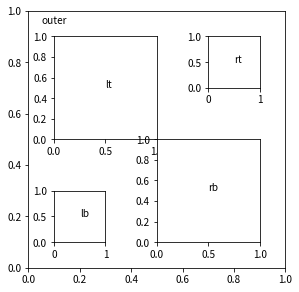

In [3]:
mp = MatPos()

outer = mp.from_left_top(mp, (5,5))
lt = mp.from_left_top(outer, (2,2), (0.5,0.5))
lb = mp.from_left_bottom(outer, (1,1), (0.5,0.5))
rt = mp.from_right_top(outer, (1,1), (0.5,0.5))
rb = mp.from_right_bottom(outer, (2,2), (0.5,0.5))

fig, axs = mp.figure_and_axes([outer, lt, lb, rt, rb]
                              ,padding={"left":1, "right":1, "top":1,"bottom":1}
                              )
print(fig,axs)
axs[0].text(0.05,0.95, "outer")
axs[1].text(0.5,0.5,"lt")
axs[2].text(0.5,0.5,"lb")
axs[3].text(0.5,0.5,"rt")
axs[4].text(0.5,0.5,"rb")

In [12]:
ax = axs[0]
ax?

Type:            AxesSubplot
String form:     AxesSubplot(0.142857,0.142857;0.714286x0.714286)
File:            c:\users\fmori\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_subplots.py
Docstring:       <no docstring>
Class docstring:
Base class for subplots, which are :class:`Axes` instances with
additional methods to facilitate generating and manipulating a set
of :class:`Axes` within a figure.
Init docstring: 
*fig* is a :class:`matplotlib.figure.Figure` instance.

*args* is the tuple (*numRows*, *numCols*, *plotNum*), where
the array of subplots in the figure has dimensions *numRows*,
*numCols*, and where *plotNum* is the number of the subplot
being created.  *plotNum* starts at 1 in the upper left
corner and increases to the right.

If *numRows* <= *numCols* <= *plotNum* < 10, *args* can be the
decimal integer *numRows* * 100 + *numCols* * 10 + *plotNum*.


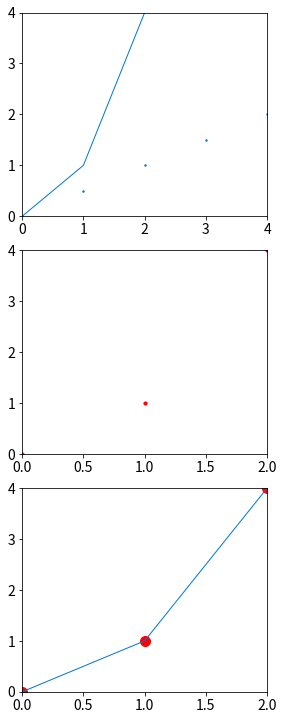

In [4]:
figure=Figure()

subplot=Subplot.create({"xTickRotation":0}) \
    .register(
        data = {"x":[0,1,2], "y":[0,1,4]},
        option = {"x" : "x", "y" : "y", "xLabel": "$X$", "yLabel" : "$Y$"},
        plot = [linePlot()],
        limit = {"xlim" : [0,10]}
    ) \
    .register(
        data = {"x":[0,1,2,3,4], "y":[0,0.5,1,1.5,2]},
        option = {"x" : "x", "y" : "y", "xLabel": "$X$", "yLabel" : "$Y$", "ylim" : [0,4]},
        plot = [scatterPlot()]
    )

figure.add_subplot(subplot,"a")

figure.add_subplot(
    Subplot.create({"xTickRotation":90})
        .register(
        data = {"x":[0,1,2], "y":[0,1,4]},
        option = {"x" : "x", "y" : "y"},
        plot = [scatterPlot({"marker_size":10, "line_color" : "red"})]
    ),
    "b"
)

figure.add_subplot(
    Subplot.create()
        .register(
        data = {"x":[0,1,2], "y":[0,1,4]},
        option = {"x" : "x", "y" : "y"},
        plot = [linePlot(), scatterPlot({"marker_size":100, "line_color" : "red"})]
    ),
    "c"
)

fig, ax = figure.show([(4,3) for i in range(figure.get_length())], 2, (1,2),test=False)


#print(ax)
#xtick = ax[0].get_xticks()
#ax[0].set_xticklabels(xtick)

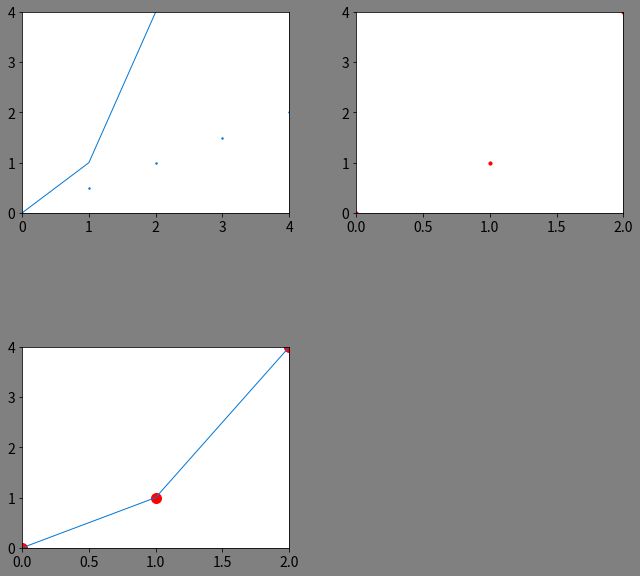

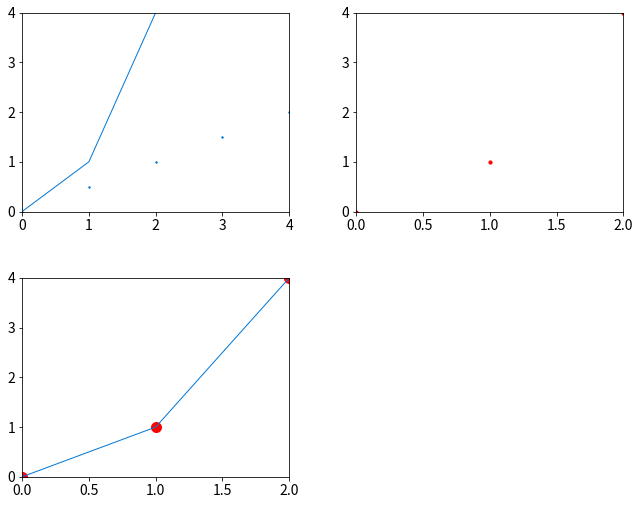

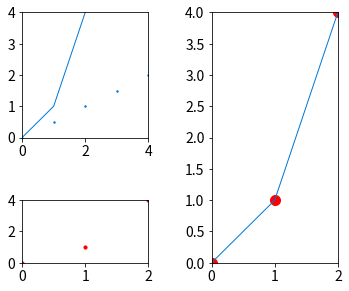

In [5]:

fig, ax = figure.show((4,3), column=2, margin=(1,2), padding={},test=False, facecolor="gray")
fig, ax = figure.show([(4,3) for i in range(figure.get_length())], column=2, margin=(1,1), padding={},test=False)

mp = MatPos()
a = mp.from_left_top(mp, (2,2))
b = mp.add_bottom(a, (2,1), margin=1)
c = mp.add_right(a, (2,None), margin=1)

fig, ax = figure.show(mp, [a,b,c])

In [2]:
Figure?

Init signature: Figure(figureStyle={})
Docstring:     
複数行・複数列のサブプロットからなる図を作成するためのクラス.
プロットデータとプロット方法を定義したSubplotを登録し,
    最後にレイアウトを指定して図を生成する.

Example
-------
# overwrite each subplot size as 10 (inch), column of subplots as 2
figure = Figure()

# add 4 subplots
figure.add_subplot(subplot1, "a")
figure.add_subplot(subplot2, "b")
figure.add_subplot(subplot3)
figure.add_subplot(subplot4)

# ============================================================
# Simple grid layout mode
#
# Grid layout with subplots having the same size.
# Distance between subplots are defined by instance variables
# =============================================================

axes = figure.show((4,3), column=2, margin=(1,1),
    padding={"left": 1, "bottom": 1})
# Grid layout with 2 column. All size are 4 x 3,
#   margin is 1 and 1 for both direction.
#
# aaaa bbbb
# aaaa bbbb
# aaaa bbbb
#
# cccc dddd
# cccc dddd
# cccc dddd
#
# Added subplots are returned as dictionary.
# Each subplots can be identified by t

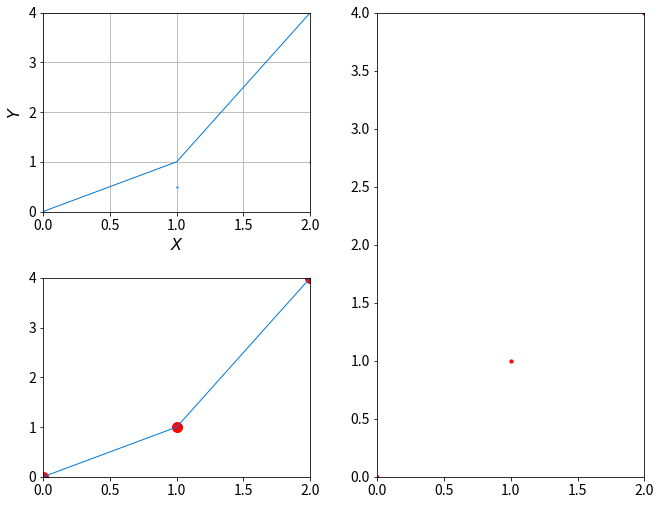

In [7]:
matpos = MatPos()
a = matpos.add_right(matpos,(4,3))
c = matpos.add_bottom(a, (4,3), margin=1, sharex=a)
b = matpos.add_right(a, (4, None), margin=1)

fig, ax = figure.show_custom(matpos, [a,b,c])
ax["a"].grid(True)

In [37]:
print(
    
    tuple(np.add((1,2),np.multiply((3,4),-1))),
    0 in (0,1,1),
    0.0 in (0,1,1),
    0 in (0.0,1,1)
    
)

a, *b = [1,2,3]
print(a,b)

(-2, -2) True True True
1 [2, 3]


## GridFigure

元のmatplotlibはpyplot.axesメソッドで自由にsubplotを配置できる.

subplot のグリッド配置を直感的に行えるようにする.

* 各subplotのプロットエリアサイズを直接指定する.

既存のsubplotを基準として, 位置を相対的に指定できる.

* gf.add_right(a) した後に, もう一度gf.add_right(a) した場合の挙動をどうするか.
    1. [x] 既存のsubplot上に重なるようにする.
        * 入れ子のサブプロットができるようにする
    2. [ ] 既存のsubplotの右に追加する.
        * subplot間の関係のマップを作る必要がある

True True True True
True True True True
True True True True
True True True True
True
True True True True
[0.16666666666666666, 0.25, 0.6666666666666667, 0.75] [0.8333333333333334, 0.25, 0.16666666666666663, 0.5] [0.0, 0.0, 1.0, 0.25] [0.16666666666666666, 0.5, 0.33333333333333337, 0.5]


Text(0.5,0.5,'d')

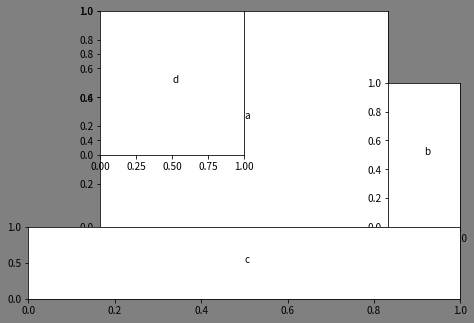

In [4]:
# Tests
padding={
    "left":0,
    "right":0,
    "top":0,
    "bottom":0
}


gf = MatPos()

"""
a a a a
a a a a
a a a a
"""
a = gf.from_left_top(gf,(4,3))
print(
    a.size == (4,3), 
    a.origin == (0,0),
    gf.left_top == (0,0),
    gf.right_bottom == (4,3)
)


"""
a a a a
a a a a b
a a a a b
"""
b = gf.add_right(a, (1,None), offset=(0,1))
print(
    b.size == (1,2), 
    b.origin == (4,1),
    gf.left_top == (0,0),
    gf.right_bottom == (5,3)
)

"""
  a a a a 
  a a a a b
  a a a a b
c c c c c c
"""

c = gf.add_bottom(a, (None,1),offset=(-1,0))
print(
    c.size == (6,1), 
    c.origin == (-1,3),
    gf.left_top == (-1,0),
    gf.right_bottom == (5,4)
)

"""
  d d a a 
  d d a a b
  a a a a b
c c c c c c
"""

d = gf.from_left_top(a, (2,2))
print(
    d.size == (2,2), 
    d.origin == (0,0),
    gf.left_top == (-1,0),
    gf.right_bottom == (5,4)
)

print(
    gf.get_size() == (6,4),
)


print(
    gf.relative(a, padding) == ((1/6, 0), (5/6, 3/4)),
    gf.relative(b, padding) == ((5/6, 1/4), (1, 3/4)),
    gf.relative(c, padding) == ((0, 3/4), (1,1)),
    gf.relative(d, padding) == ((1/6, 0), (3/6, 2/4))
)

print(
    gf.axes_position(a, padding),
    gf.axes_position(b, padding),
    gf.axes_position(c, padding),
    gf.axes_position(d, padding)
)

fig, axes = gf.figure_and_axes([a,b,c,d],padding=padding, facecolor="gray")

axes[0].text(0.5,0.5,"a")
axes[1].text(0.5,0.5,"b")
axes[2].text(0.5,0.5,"c")
axes[3].text(0.5,0.5,"d")



Text(0.5,0.5,'c')

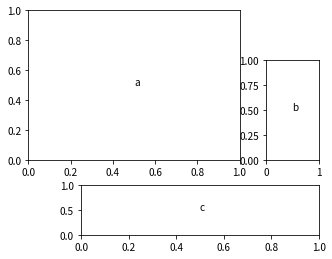

In [8]:
# Tests

gf = MatPos()

a = gf.from_left_top(gf,(4,3))
b = gf.add_right(a, (1,None), offset=(0.5,1))
c = gf.add_bottom(a, (None,1),offset=(1,0.5))


fig, axes = gf.figure_and_axes([a,b,c], padding={"left":1,"right":1,"top":1,"bottom":1})

axes[0].text(0.5,0.5,"a")
axes[1].text(0.5,0.5,"b")
axes[2].text(0.5,0.5,"c")



(5.5, 4.5)


[]

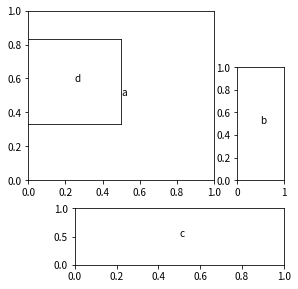

In [9]:
# Tests

gf = MatPos()

a = gf.from_left_top(gf,(4,3))
b = gf.add_right(a, (1,None), offset=(0.5,1))
c = gf.add_bottom(a, (None,1),offset=(1,0.5))
d = gf.from_left_top(a, (2,1.5), offset=(0,.5))

print(gf.get_size())
fig, axes = gf.figure_and_axes([a,b,c,d],figsize=(4,4))

axes[0].text(0.5,0.5,"a")
axes[1].text(0.5,0.5,"b")
axes[2].text(0.5,0.5,"c")
axes[3].text(0.5,0.5,"d")
axes[3].set_xticks([])
axes[3].set_yticks([])

Text(0.5,0.5,'d')

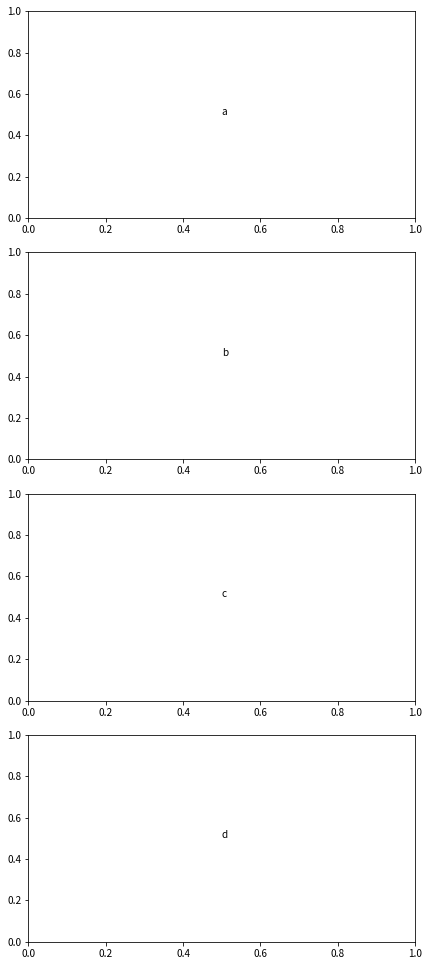

In [10]:
# Tests

gf = MatPos()

a = gf.add_bottom(gf,(6,3))
b = gf.add_bottom(a, (6,3), offset=(0,0.5))
c = gf.add_bottom(b, (6,3), offset=(0,0.5))
d = gf.add_bottom(c, (6,3), offset=(0,0.5))

fig,axes = gf.figure_and_axes([a,b,c,d])


axes[0].text(0.5,0.5,"a")
axes[1].text(0.5,0.5,"b")
axes[2].text(0.5,0.5,"c")
axes[3].text(0.5,0.5,"d")


Subplot のサイズ指定方法について

* Default: 同じサイズのsubplotを行列に並べる. 列数を指定
* Later: データとアクションを指定した後からサイズを指定
* Contemporaly: データ指定時にサイズも指定
* Prior: 先にサイズを指定しておいて後からデータを流し込む

```python
figure = Figure()

a = figure.add_bottom(subplot_a, size, offset)
b = figure.add_bottom(subplot_b, size, offset, a)

figure.align(gridder.figure_and_axes([a,b])
figure.show(gridder.figure_and_axes([a,b]))
             
# grid layout
figure = Figure.grid(column)
a = figure.add_subplot(subplot_a, size, offset)
b = figure.add_subplot(subplot_a, size, offset)
```

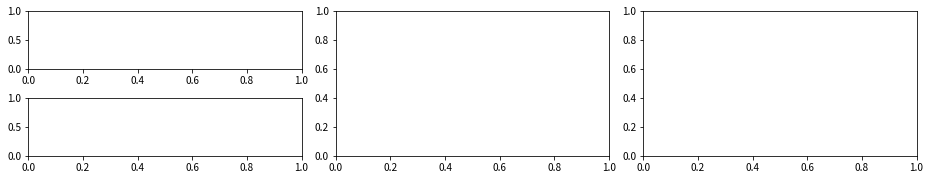

In [4]:
gf = MatPos()



"""
reduce(
    acc, e -> acc,
    es,
    init
)
"""


sgs =  gf.add_grid([(4,1),(4,2.5),(4,1)], 2, (0.5,0.5))

d = gf.add_right(sgs[1], (4,None), (0.5,0))

fig, axes = gf.figure_and_axes([*sgs,d])

(8, 7.0)
(0, 0.0)


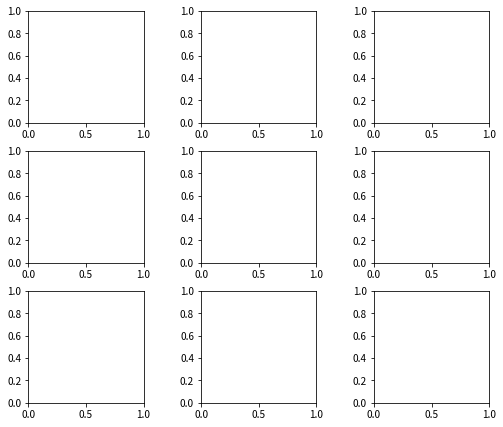

In [25]:
gf = MatPos({"left":1, "right":1, "top":1,"bottom":1})

"""
1 2 3
4 5 6
7 8 9
"""

"""
reduce(
    acc, e -> acc,
    es,
    init
)
"""


sgs =  gf.add_grid([(2,2) for i in range(9)], 3, (1,0.5))
print(gf.get_size())
print(gf.left_top)
fig, axes = gf.figure_and_axes(sgs)

Text(0.5,0.5,'e')

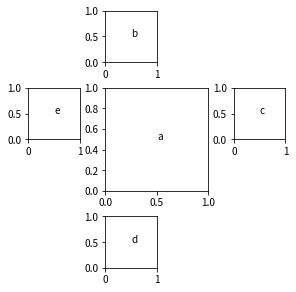

In [12]:
mp = MatPos()

a = mp.add_bottom(mp,(2,2))
b = mp.add_top(a, (1,1), margin=0.5)
c = mp.add_right(a, (1,1), margin=0.5)
d = mp.add_bottom(a, (1,1), margin=0.5)
e = mp.add_left(a, (1,1), margin=0.5)

fig, axes = mp.figure_and_axes([a,b,c,d,e],padding={"left":1, "right":1, "top":1,"bottom":1})

axes[0].text(0.5,0.5,"a")
axes[1].text(0.5,0.5,"b")
axes[2].text(0.5,0.5,"c")
axes[3].text(0.5,0.5,"d")
axes[4].text(0.5,0.5,"e")